In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv("Cleaned_Wildland_Fires.csv")

## Dependability of Wind Speed and size of Wildland-Fires

In [4]:
d = df.copy()

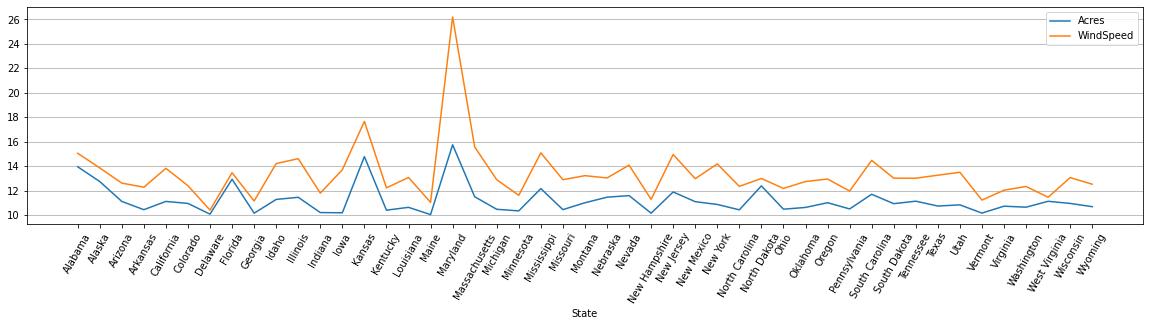

In [189]:
scaler = MinMaxScaler(feature_range=(10, max(df.WindSpeed)))
d.Acres = scaler.fit_transform(d[["Acres"]])
ax = d.groupby(['State']).mean()[['Acres','WindSpeed']].plot(figsize=(20, 4))
ax.set_xticks(range(len(d.State.unique())));
ax.set_xticklabels([item for item in sorted(d.State.unique())], rotation=60);
ax.grid(axis='y')

* In the Scatter Plot below we can see that fires spread the most at wind speeds that range between 10 and 20
* Winds too weak will not spread the fire since it doesn't push the flames to new fuels
* As a general rule, higher windspeeds are steadier in direction, which means the fire will grow to a single direction reaching the end of a forest faster while consuming less of it to other directions
* The blue dots indicate fires that started while temperature was below 0, we can see that wild fires that start in this condition are mostly below 200 acres and have a harder time to grow

<AxesSubplot:title={'center':'Fire size and wind speed'}, xlabel='WindSpeed', ylabel='Acres'>

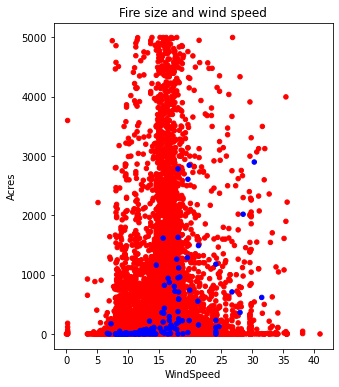

In [190]:
d = p.sort_values(by="MaxTemp", ascending=False)
d.loc[d.MaxTemp >= 0, 'c'] = 'red'
d.loc[d.MaxTemp < 0, 'c'] = 'blue'
d.plot(x='WindSpeed', y='Acres', kind='scatter', c=p.c, figsize=(5, 6), title="Fire size and wind speed")

## Dependability of Fire Cause and its Duration

In [21]:
d = df.copy()

<AxesSubplot:title={'center':'Fire Cause Distribution'}>

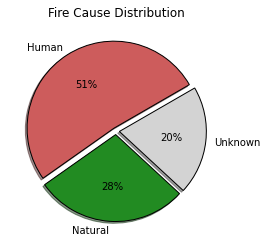

In [33]:
d.FireCause.str.get_dummies().value_counts().plot.pie(
label="",
shadow=True,
startangle=30,
autopct='%1.0f%%',
explode=(0.04, 0.04, 0.04),
title = "Fire Cause Distribution",
labels=df.FireCause.value_counts().index,
colors = ['indianred', 'forestgreen', 'lightgrey'],
wedgeprops = {"edgecolor" : "black",
              'linewidth': 1,
              'antialiased': True})

<AxesSubplot:title={'center':'Duration of Fire by Cause'}, xlabel='FireCause', ylabel='Days'>

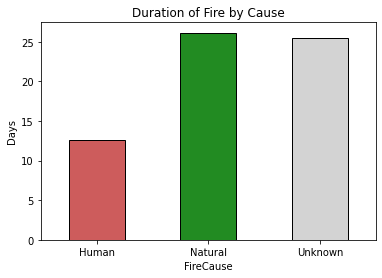

In [26]:
d.groupby(['FireCause']).mean()['Duration'].plot(
    kind = "bar", 
    color=['indianred', 'forestgreen', 'lightgrey'],
    edgecolor = ['black', 'black', 'black'],
    title="Duration of Fire by Cause",
    rot = 0,
    ylabel = "Days")

## Prespective of amount of fires in California and all other States

California makes up for 22% of the fires in the US

<AxesSubplot:title={'center':'Amount of Wildfires Distribution'}>

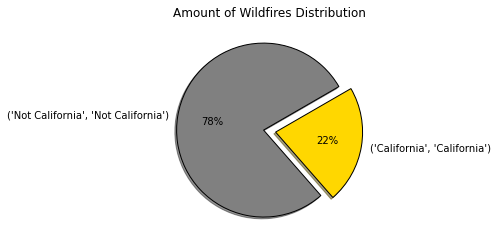

In [29]:
df_cal = pd.read_csv("Full_Wildland_Fires.csv")[['POOState', 'DailyAcres']].copy()
df_cal.POOState.loc[df_cal.POOState != "US-CA"] = "Not California"
df_cal.POOState.loc[df_cal.POOState == "US-CA"] = "California"

df_cal.POOState.str.get_dummies().value_counts().plot.pie(
label="",
shadow=True,
startangle=30,
autopct='%1.0f%%',
explode=(0.07, 0.07),
title = "Amount of Wildfires Distribution",
labels=df_state.value_counts().index,
colors = ['gray', 'gold'],
wedgeprops = {"edgecolor" : "black",
              'linewidth': 1,
              'antialiased': True})

## Location of fires with temperature

The below implementation creates and interactive map with the fire locations and the temperature at that area when it started, since it makes the notebook lag, the cell below it shows the map as an image.

In [17]:
d = df.copy()
d = d[["Lat", "Long", "MaxTemp"]]
fig = px.scatter_geo(d,
                     lat='Lat',lon='Long', 
                     hover_data=['MaxTemp'], 
                     color=d['MaxTemp'])
fig.update_layout(title = 'Map of US Wildland Fires', 
                  title_x=0.5,
                  geo_scope='usa',
                  coloraxis_colorbar=dict(title="Tempreture on day 1"))
fig.update_traces(marker=dict(size=3))
fig.show()

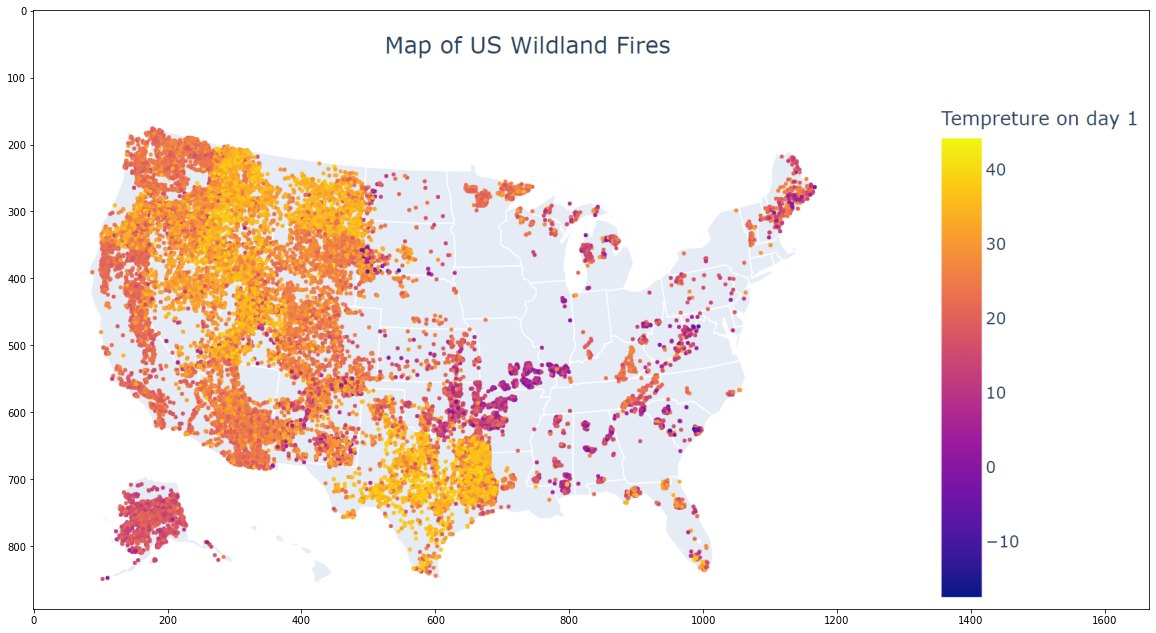

In [35]:
img = cv2.imread("Map_Of_Fire_Locations_With_Temp.png")
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.imshow(img[:,:,::-1])
ax.set_aspect(1)

## Outliers

The below implementation creates an interactive map of the fire locations andand shows the outliers around the world (everything is suppose to be inside the US). 
The colors are unique for each state and it shows that the outlier coordinates were most probably a wrong input since their colors match differenet US states.
Since it makes the notebook lag, the cell below it shows the map as an image.

In [16]:
d = pd.read_csv("Outliers_Wildland_Fires.csv")[["Lat", "Long", "State"]].copy()

fig = px.scatter_geo(d,
                     lat='Lat',lon='Long',
                     color=d.State)
fig.update_layout(title = 'Map of US Wildland Fires with coordinate outliers', 
                  title_x=0.5,
                  geo_scope='world')
fig.update_traces(marker=dict(size=3))
fig.show()

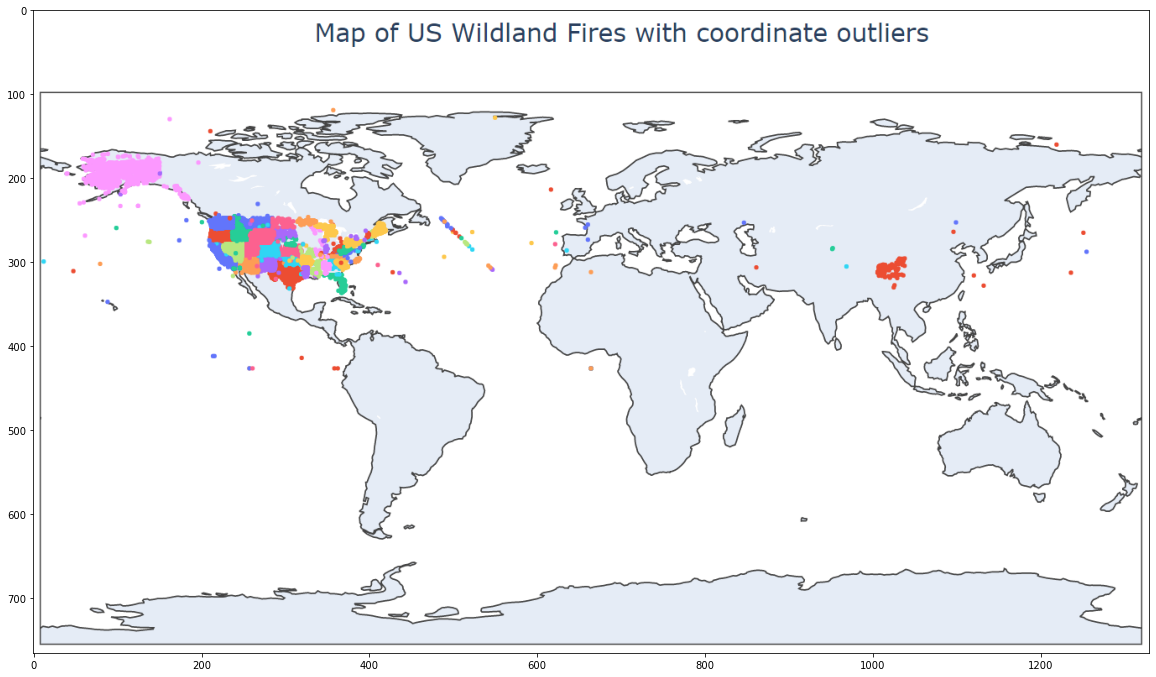

In [19]:
img = cv2.imread("World_map_outliers.png")
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.imshow(img[:,:,::-1])
ax.set_aspect(1)

Coordinates that are incorrect.

Lat must be between:  (-90, 90)

Long must be between: (-180, 180)

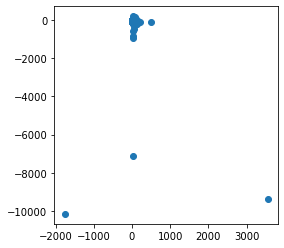

In [7]:
fig = plt.figure(figsize = (4, 4))
ax = plt.axes()
ax.scatter(d.Lat, d.Long)
plt.show()

Duration is the time it took to extinguish a fire since its discovery.
Most fires are less than a day and some take weeks, months or even years.
In the boxplot below we can see an outlier that took -175,000 days to extinguish.

<AxesSubplot:xlabel='Duration'>

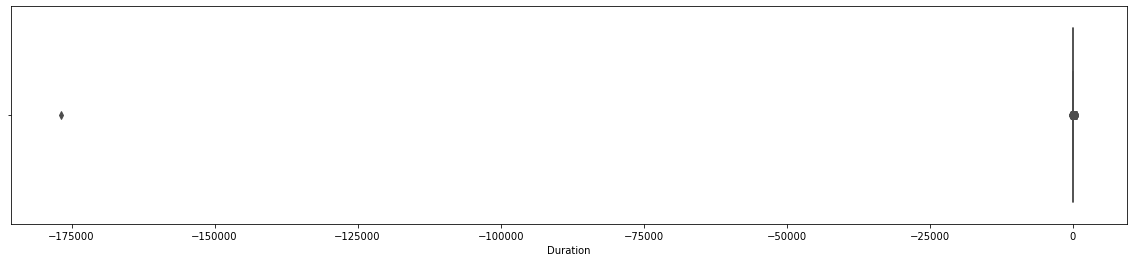

In [4]:
d = pd.read_csv("Outliers_Wildland_Fires.csv").copy()

fig = plt.figure(figsize=(20, 4))
sns.boxplot(x = d.Duration, whis=5, color = 'blue')

<AxesSubplot:xlabel='Duration'>

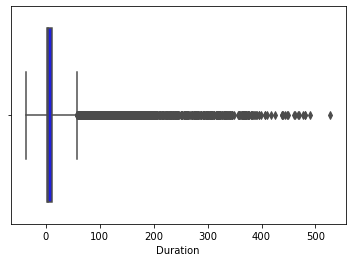

In [6]:
d = d[d.Duration > -200]
sns.boxplot(x = d.Duration, whis=5, color = 'blue')

Some of the fires are extremly big compared to the others, which we can clearly see below.
Most of the fires are squished at the bottom and data seems like it has very few small fires but they actually make up 99.7% of the fires.

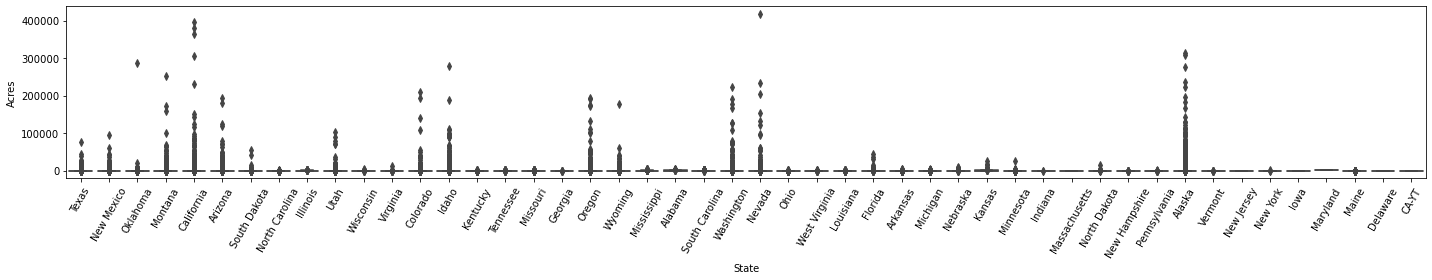

In [12]:
fig = plt.figure(figsize=(20,4))
g = sns.boxplot(x = d.State, y = d.Acres)
plt.xticks(rotation=60)
plt.tight_layout()